epoch : 10, loss = 4430.94921875:.4f
epoch : 20, loss = 3304.328369140625:.4f
epoch : 30, loss = 2489.364013671875:.4f
epoch : 40, loss = 1899.2030029296875:.4f
epoch : 50, loss = 1471.4041748046875:.4f
epoch : 60, loss = 1161.011474609375:.4f
epoch : 70, loss = 935.6093139648438:.4f
epoch : 80, loss = 771.7968139648438:.4f
epoch : 90, loss = 652.6581420898438:.4f
epoch : 100, loss = 565.9520263671875:.4f


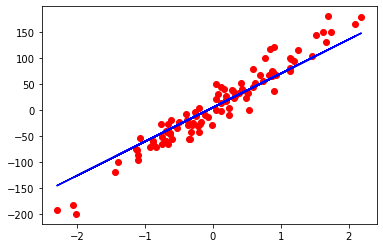

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  #?

n_samples, n_features = X.shape

# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs) :
    # forward pass
    y_pred = model(X)
    
    # loss 
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad() # gradient가 accumulation 되는 것을 방지
    
    if (epoch + 1) % 10 == 0 :
        print(f"epoch : {epoch + 1}, loss = {loss.item()}:.4f")

# plot
predicted = model(X).detach().numpy() # generate new tensor to prevent operatation
plt.plot(X_numpy, y_numpy, 'ro') # train data set plot
plt.plot(X_numpy, predicted, 'b') # prediction plot
plt.show()